In [1]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv("../Datasets/amazon_reviews_labelled.csv")

In [3]:
df.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'RATING', 'VERIFIED_PURCHASE', 'REVIEW_TITLE',
       'REVIEW_TEXT', 'NUM_NOUNS', 'NUM_VERBS', 'NUM_ADJECTIVES',
       'NUM_ADVERBS', 'REVIEW_LENGTH', 'SENTIMENT_SCORE', 'TITLE_LENGTH',
       'AVERAGE_RATING', 'RATING_DEVIATION', 'NUM_REVIEWS', 'READABILITY_FRE',
       'SENTIMENT_CATEGORY_ENCODED', 'RATING_CATEGORY_ENCODED',
       'COHERENT_ENCODED', 'AVG_WORD_LENGTH', 'LABEL_ENCODED',
       'NUM_NAMED_ENTITIES', 'CAPITAL_CHAR_COUNT', 'PUNCTUATION_COUNT',
       'PREPROCESSED_REVIEW_TEXT', 'WORD_COUNT', 'SENTIMENT_SCORE_TITLE',
       'SENTIMENT_LABEL_TITLE', 'AVG_RATING_VERIFIED',
       'AVG_RATING_NON_VERIFIED', 'DEVIATION_VERIFIED',
       'DEVIATION_NON_VERIFIED'],
      dtype='object')

In [7]:
features = [
    'RATING', 'VERIFIED_PURCHASE', 'NUM_NOUNS', 'NUM_VERBS', 'NUM_ADJECTIVES',
       'NUM_ADVERBS', 'REVIEW_LENGTH', 'SENTIMENT_SCORE', 'TITLE_LENGTH',
       'AVERAGE_RATING', 'RATING_DEVIATION', 'NUM_REVIEWS', 'READABILITY_FRE',
       'SENTIMENT_CATEGORY_ENCODED', 'RATING_CATEGORY_ENCODED',
       'COHERENT_ENCODED', 'AVG_WORD_LENGTH',
       'NUM_NAMED_ENTITIES', 'CAPITAL_CHAR_COUNT', 'PUNCTUATION_COUNT',
        'WORD_COUNT', 'SENTIMENT_SCORE_TITLE',
       'SENTIMENT_LABEL_TITLE', 'AVG_RATING_VERIFIED',
       'AVG_RATING_NON_VERIFIED', 'DEVIATION_VERIFIED',
       'DEVIATION_NON_VERIFIED'
    
]

In [12]:
len(features)

27

In [8]:
X = df[features]
Y = df['LABEL_ENCODED']

In [9]:
#MINMAX SCALING
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [10]:
from minisom import MiniSom

In [18]:
#INITIALISE THE SOM
som = MiniSom(
    x=5, y=5, #DIMENSION OF GRID
    input_len = 27, #NUMBER OF FEATURES IN X
    sigma = 1.0, #RADIUS OF NEIGHBORHOOD
    learning_rate = 0.5, #WEIGHT UPDATION 
)

In [19]:
#INITIALISE THE WEIGHTS OF SOM [COORDINATES OF OUTPUT NODES]
som.random_weights_init(X) #DATA FOR TRAINING
som.train_random(
    data = X, #TRAINING DATA
    num_iteration = 10000
)

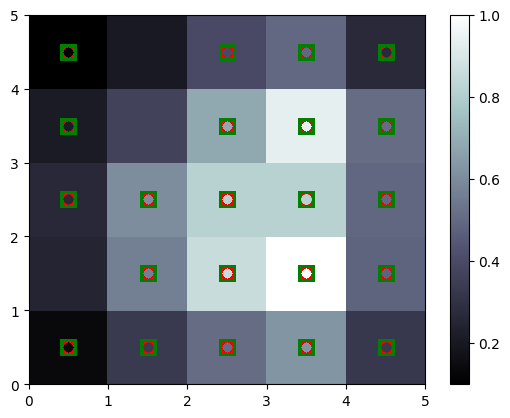

In [20]:
#VISUALISE THE RESULTS: PLOT THE SOM: COLOR BASED ON MID
from pylab import bone, pcolor, colorbar, plot, show

#INITIALISE FIGURE
bone()

#ADD INFORMATION ON MID: COLORS FOR RANGES
pcolor(som.distance_map().T) #TRANSPOSE OF MID

#ADD A LEGEND
colorbar() #NORMALISED MID VALUES

#ADD MARKERS USING LABELS: APPROVED OR NOT APPROVED
markers = ['o', 's'] #CIRCLE & SQUARE
colors = ['r', 'g'] #RED OR GREEN

for i, x in enumerate(X): #GET INDEX & DATA
    #GET WINNING NODE FOR RECORD
    w = som.winner(x)
    
    #PLACE MARKER
    plot(
        w[0]+0.5, w[1]+0.5, #COORDINATES OF CENTER OF NODE
        markers[Y[i]],
        markeredgecolor = colors[Y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2
        
    )
show()